In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
traindata = pd.read_csv("Train/Train_Data.csv")
traindata.head()
testdata = pd.read_csv("Test/Test_Data.csv")
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [20]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             360 non-null    int64  
 1   MSSubClass     360 non-null    int64  
 2   MSZoning       360 non-null    object 
 3   LotFrontage    293 non-null    float64
 4   LotArea        360 non-null    int64  
 5   Street         360 non-null    object 
 6   Alley          22 non-null     object 
 7   LotShape       360 non-null    object 
 8   LandContour    360 non-null    object 
 9   Utilities      360 non-null    object 
 10  LotConfig      360 non-null    object 
 11  LandSlope      360 non-null    object 
 12  Neighborhood   360 non-null    object 
 13  Condition1     360 non-null    object 
 14  Condition2     360 non-null    object 
 15  BldgType       360 non-null    object 
 16  HouseStyle     360 non-null    object 
 17  OverallQual    360 non-null    int64  
 18  OverallCon

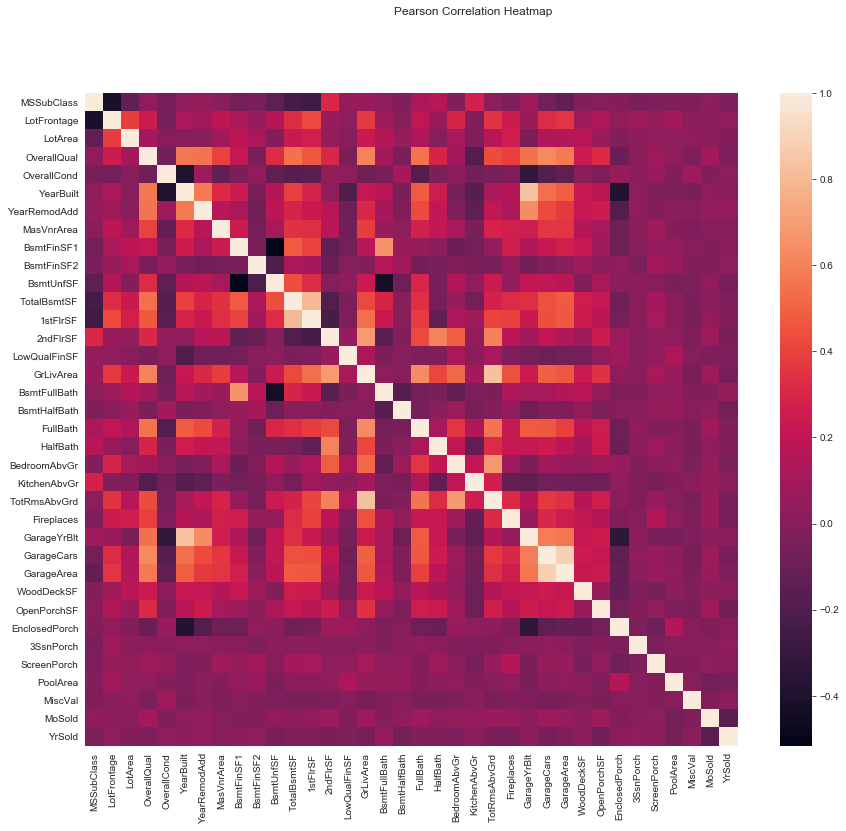

In [21]:
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")

pd.set_option('precision',2)
plt.figure(figsize=(15,12))
sns.heatmap(traindata.drop(["SalePrice","Id"],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()


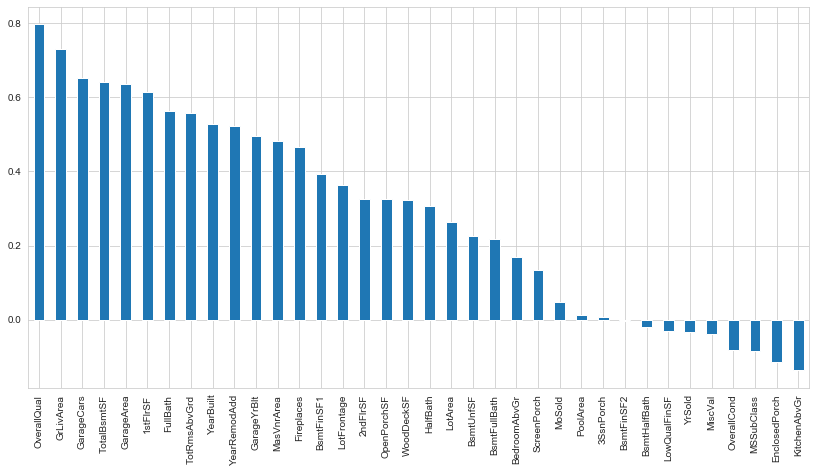

In [22]:
corr_with_SalePrice = traindata.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.show()

del corr_with_SalePrice

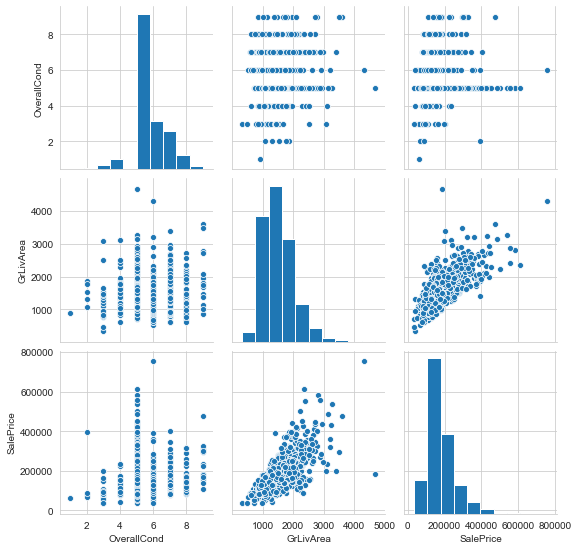

In [23]:
sns.pairplot(traindata[["OverallCond", "GrLivArea","SalePrice"]])
plt.show()


In [24]:
null_values_per_col = np.sum(traindata.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print(null_values_per_col)

max_na = int(2*traindata.shape[0]/3.0)
cols_to_remove = []

for col in traindata.drop(["Id","SalePrice"],axis=1).columns.tolist():
    if null_values_per_col[col] > max_na: 
        cols_to_remove.append(col)
        traindata.drop(col, axis=1, inplace=True)
        
print("New shape of the training set is: (%d,%d)" %traindata.shape)        

testdata.drop(cols_to_remove, axis=1, inplace=True)


MSSubClass         0
MSZoning           0
LotFrontage      192
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64
New shape of the training set is: (1100,77)


In [25]:
traindata.info()
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    908 non-null    float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   LotShape       1100 non-null   object 
 7   LandContour    1100 non-null   object 
 8   Utilities      1100 non-null   object 
 9   LotConfig      1100 non-null   object 
 10  LandSlope      1100 non-null   object 
 11  Neighborhood   1100 non-null   object 
 12  Condition1     1100 non-null   object 
 13  Condition2     1100 non-null   object 
 14  BldgType       1100 non-null   object 
 15  HouseStyle     1100 non-null   object 
 16  OverallQual    1100 non-null   int64  
 17  OverallCond    1100 non-null   int64  
 18  YearBuil

In [26]:
null_values_per_col = np.sum(traindata.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
col_to_change = []
for col in null_values_per_col.items():
    if(col[1] > 0):
        col_to_change.append(col[0])
print(col_to_change,len(col_to_change))
    

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] 14


In [27]:
medianval = dict()
for col in col_to_change:
    if traindata[col].dtype == "float64" or traindata[col].dtype == "int64":
        medianval[col] = np.nanmedian(traindata[col])
    else:
        medianval[col] = traindata[col].value_counts().argmax()
        
for key,val in medianval.items():
    traindata[key].fillna(value = val,inplace = True)
        

In [28]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    1100 non-null   float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   LotShape       1100 non-null   object 
 7   LandContour    1100 non-null   object 
 8   Utilities      1100 non-null   object 
 9   LotConfig      1100 non-null   object 
 10  LandSlope      1100 non-null   object 
 11  Neighborhood   1100 non-null   object 
 12  Condition1     1100 non-null   object 
 13  Condition2     1100 non-null   object 
 14  BldgType       1100 non-null   object 
 15  HouseStyle     1100 non-null   object 
 16  OverallQual    1100 non-null   int64  
 17  OverallCond    1100 non-null   int64  
 18  YearBuil

In [29]:
medianval1 = dict()
for col in col_to_change:
    if testdata[col].dtype == "float64" or testdata[col].dtype == "int64":
        medianval1[col] = np.nanmedian(testdata[col])
    else:
        medianval1[col] = testdata[col].value_counts().argmax()
        
for key,val in medianval1.items():
    testdata[key].fillna(value = val,inplace = True)
        
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             360 non-null    int64  
 1   MSSubClass     360 non-null    int64  
 2   MSZoning       360 non-null    object 
 3   LotFrontage    360 non-null    float64
 4   LotArea        360 non-null    int64  
 5   Street         360 non-null    object 
 6   LotShape       360 non-null    object 
 7   LandContour    360 non-null    object 
 8   Utilities      360 non-null    object 
 9   LotConfig      360 non-null    object 
 10  LandSlope      360 non-null    object 
 11  Neighborhood   360 non-null    object 
 12  Condition1     360 non-null    object 
 13  Condition2     360 non-null    object 
 14  BldgType       360 non-null    object 
 15  HouseStyle     360 non-null    object 
 16  OverallQual    360 non-null    int64  
 17  OverallCond    360 non-null    int64  
 18  YearBuilt 

In [30]:
k=0
print(len(testdata["Electrical"]))
for c in testdata["Electrical"].isnull():
    k+=1
    if(c==True):
         print(k)
testdata[279:280]["Electrical"] = testdata["Electrical"].value_counts().argmax()           
testdata.info()

360
280
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             360 non-null    int64  
 1   MSSubClass     360 non-null    int64  
 2   MSZoning       360 non-null    object 
 3   LotFrontage    360 non-null    float64
 4   LotArea        360 non-null    int64  
 5   Street         360 non-null    object 
 6   LotShape       360 non-null    object 
 7   LandContour    360 non-null    object 
 8   Utilities      360 non-null    object 
 9   LotConfig      360 non-null    object 
 10  LandSlope      360 non-null    object 
 11  Neighborhood   360 non-null    object 
 12  Condition1     360 non-null    object 
 13  Condition2     360 non-null    object 
 14  BldgType       360 non-null    object 
 15  HouseStyle     360 non-null    object 
 16  OverallQual    360 non-null    int64  
 17  OverallCond    360 non-null    int64  
 18  Ye

/Users/harshit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# traindata.info()

In [37]:
for col in traindata:
    if(traindata[col].dtype == "object"):
        traindata[col] = le.fit_transform(traindata[col])

TypeError: argument must be a string or number

In [38]:
for col1 in testdata:
    if(testdata[col1].dtype == "object"):
        print(col1)
        testdata[col1] = le.fit_transform(testdata[col1])
        

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType


TypeError: argument must be a string or number

In [ ]:
testdata.head()

In [39]:
traindata = traindata.drop(['Id'],axis = 1)


In [40]:
traindata = traindata.values
X = traindata[:,:-1]
Y = traindata[:,-1]
testdata = testdata.values
xtest = testdata[:,1:]


In [41]:
print(X,Y,X.shape,Y.shape)
Y=Y.reshape((Y.shape[0],1))
print(X,Y,X.shape,Y.shape,xtest.shape)


[[60 3 65.0 ... 2008 'WD' 'Normal']
 [20 3 80.0 ... 2007 'WD' 'Normal']
 [60 3 68.0 ... 2008 'WD' 'Normal']
 ...
 [120 3 70.0 ... 2007 'WD' 'Normal']
 [50 4 50.0 ... 2009 'WD' 'Normal']
 [20 3 82.0 ... 2009 'COD' 'Abnorml']] [208500 181500 223500 ... 170000 128000 157000] (1100, 75) (1100,)
[[60 3 65.0 ... 2008 'WD' 'Normal']
 [20 3 80.0 ... 2007 'WD' 'Normal']
 [60 3 68.0 ... 2008 'WD' 'Normal']
 ...
 [120 3 70.0 ... 2007 'WD' 'Normal']
 [50 4 50.0 ... 2009 'WD' 'Normal']
 [20 3 82.0 ... 2009 'COD' 'Abnorml']] [[208500]
 [181500]
 [223500]
 ...
 [170000]
 [128000]
 [157000]] (1100, 75) (1100, 1) (360, 75)


# model

In [42]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras import metrics

In [43]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                2280      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,596
Trainable params: 3,596
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                2280      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,596
Trainable params: 3,596
Non-trainable params: 0
_________________________________________________________________


In [48]:
x_val = X[:500]
x_train_new = X[500:]
y_val = Y[:500]
y_train_new = Y[500:]
x_train_new=np.asarray(x_train_new)
y_train_new=np.asarray(y_train_new)

In [49]:
hist = model.fit(x_train_new, y_train_new, validation_data=(x_val,y_val), epochs=500, batch_size=40)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [16]:
h = hist.history

NameError: name 'hist' is not defined

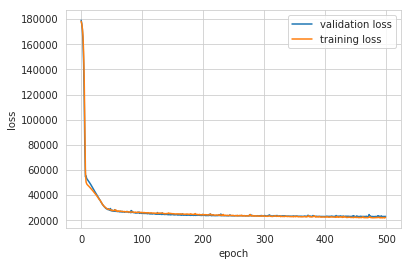

In [28]:
plt.plot(h['val_loss'],label = "validation loss")
plt.plot(h['loss'],label="training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

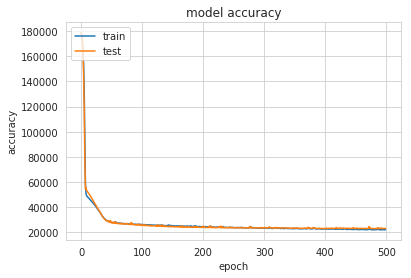

In [29]:
#summarize history for accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
print(type(xtest))
pred = model.predict(xtest)
print(pred)

<class 'numpy.ndarray'>
[[ 74815.31 ]
 [115346.555]
 [126376.61 ]
 [123090.75 ]
 [120900.125]
 [338780.72 ]
 [168146.31 ]
 [204266.33 ]
 [173157.17 ]
 [316915.22 ]
 [169595.73 ]
 [192527.16 ]
 [109953.63 ]
 [122687.85 ]
 [108273.32 ]
 [288205.78 ]
 [149504.75 ]
 [127325.97 ]
 [146626.56 ]
 [113463.35 ]
 [106467.93 ]
 [225800.89 ]
 [103578.53 ]
 [ 89585.375]
 [143633.73 ]
 [128489.37 ]
 [206354.1  ]
 [213478.69 ]
 [188627.28 ]
 [139407.06 ]
 [214472.73 ]
 [105899.32 ]
 [178644.06 ]
 [230500.81 ]
 [163810.81 ]
 [104379.836]
 [129152.02 ]
 [ 95466.586]
 [250383.81 ]
 [125261.79 ]
 [142945.72 ]
 [183878.9  ]
 [376761.7  ]
 [107638.74 ]
 [113935.73 ]
 [140566.27 ]
 [166487.11 ]
 [149737.33 ]
 [110769.59 ]
 [147414.78 ]
 [103638.65 ]
 [193332.38 ]
 [154488.5  ]
 [110697.07 ]
 [200396.81 ]
 [197139.84 ]
 [149118.81 ]
 [207247.94 ]
 [222292.27 ]
 [195566.36 ]
 [144921.64 ]
 [197093.67 ]
 [123996.94 ]
 [154857.62 ]
 [178045.52 ]
 [213138.64 ]
 [246797.44 ]
 [180030.38 ]
 [211031.   ]
 [456191.3

In [31]:
my_dict = { 'Id' : np.round(testdata[:,0].reshape((-1,))).astype('int64'),
            'Saleprice' : np.round(pred.reshape((-1,))).astype('int64')}
print(my_dict)
df = pd.DataFrame(my_dict)


{'Id': array([1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
       1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
       1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166,
       1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177,
       1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188,
       1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199,
       1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
       1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
       1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232,
       1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243,
       1244, 1245, 1246, 1247, 1248, 1249, 1

In [32]:
df.to_csv("submission.csv",index=False)